### Model Averaging
Below are shown the results of six models from the study: BigVAR, GARCH, ARIMA, Univariate LSTM, Multivariate LSTM, Univariate LSTM with walk-forward forecasting as well as the true prices and the RW benchmark. From the six models, an ensemble average is obtained and all the predictions and the benchmark are evaluated in terms of $RMSE$, $MAE$ and $MedAE$. 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plot configurations
plt.style.use('seaborn-v0_8')
plt.rcParams['font.size'] = 8

In [3]:
# Error Metrics
def rmse(true, predicted):
    return np.round(np.sqrt(np.mean(np.square(predicted - true))), 4)

def mae(true, predicted):
    return np.round(np.mean(np.abs(predicted - true)), 4)

def medae(true, predicted):
    return np.round(np.median(np.abs(predicted - true)), 4)


In [22]:
path = '/home/RDC/anasashb/Dokumente/brent_price_forecasting/model_averaging/results.csv' 
results_df = pd.read_csv(path, index_col='Date')
results_df.head()

,BigVAR,GARCH,ARIMA,Multivariate_LSTM,Univariate_LSTM,WF_Univariate_LSTM,RW_benchmark,true_prices
Date,,,,,,,,
2016-09-30,43.125730,43.424820,39.028616,41.161087,42.638460,43.992516,42.158092,43.667110
2016-10-31,43.130090,43.786186,42.426082,42.909870,44.198920,44.881210,43.667110,43.985065
2016-11-30,47.977250,43.223827,43.717387,43.321644,44.558610,44.682010,43.985065,47.662670
2016-12-30,50.165382,48.020730,47.263667,47.273830,48.181934,47.636757,47.662670,54.026814
2017-01-31,54.132870,54.329155,56.809323,53.793484,54.416480,53.786335,54.026814,51.583626


In [23]:
# Generate ensemble average
results_df['Ensemble'] = results_df.iloc[:, 0:6].mean(axis=1)
results_df.head()

,BigVAR,GARCH,ARIMA,Multivariate_LSTM,Univariate_LSTM,WF_Univariate_LSTM,RW_benchmark,true_prices,Ensemble
Date,,,,,,,,,
2016-09-30,43.125730,43.424820,39.028616,41.161087,42.638460,43.992516,42.158092,43.667110,42.228538
2016-10-31,43.130090,43.786186,42.426082,42.909870,44.198920,44.881210,43.667110,43.985065,43.555393
2016-11-30,47.977250,43.223827,43.717387,43.321644,44.558610,44.682010,43.985065,47.662670,44.580121
2016-12-30,50.165382,48.020730,47.263667,47.273830,48.181934,47.636757,47.662670,54.026814,48.090383
2017-01-31,54.132870,54.329155,56.809323,53.793484,54.416480,53.786335,54.026814,51.583626,54.544608


In [24]:
# List all columns but the true_prices
preds = [col for col in results_df.columns if col != 'true_prices']
true = results_df['true_prices']
# Generate error metrics
for col in results_df[preds]:
    
    rmse_test = rmse(true, results_df[col])
    mae_test = mae(true, results_df[col])
    medae_test = medae(true, results_df[col])
        
    print(f'{col} - RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, MedAE: {medae_test:.4f}.')

BigVAR - RMSE: 5.9622, MAE: 4.5812, MedAE: 3.8780.
GARCH - RMSE: 6.1750, MAE: 4.5677, MedAE: 3.5013.
ARIMA - RMSE: 6.2571, MAE: 4.6263, MedAE: 3.5883.
Multivariate_LSTM - RMSE: 5.8616, MAE: 4.3988, MedAE: 3.5572.
Univariate_LSTM - RMSE: 5.9132, MAE: 4.3353, MedAE: 3.3276.
WF_Univariate_LSTM - RMSE: 6.3938, MAE: 4.6717, MedAE: 3.7446.
RW_benchmark - RMSE: 6.0164, MAE: 4.4952, MedAE: 3.4305.
Ensemble - RMSE: 5.8431, MAE: 4.3317, MedAE: 3.5863.


It can be shown that the ensemble average outperforms every other model fitted. The significance of this improvement can be tested using the DM test. 

In [32]:
results_df

,BigVAR,GARCH,ARIMA,Multivariate_LSTM,Univariate_LSTM,WF_Univariate_LSTM,RW_benchmark,true_prices,Ensemble
Date,,,,,,,,,
2016-09-30,43.125730,43.424820,39.028616,41.161087,42.638460,43.992516,42.158092,43.667110,42.228538
2016-10-31,43.130090,43.786186,42.426082,42.909870,44.198920,44.881210,43.667110,43.985065,43.555393
2016-11-30,47.977250,43.223827,43.717387,43.321644,44.558610,44.682010,43.985065,47.662670,44.580121
2016-12-30,50.165382,48.020730,47.263667,47.273830,48.181934,47.636757,47.662670,54.026814,48.090383
2017-01-31,54.132870,54.329155,56.809323,53.793484,54.416480,53.786335,54.026814,51.583626,54.544608
...,...,...,...,...,...,...,...,...,...
2022-12-30,74.836990,82.241920,79.817556,80.049370,81.007640,82.917670,82.096870,80.252220,80.145191
2023-01-31,84.544000,86.101090,83.339450,78.183160,79.030350,81.571335,80.252220,77.777780,82.128231
2023-02-28,76.773865,82.993250,80.767396,75.548800,76.769860,79.042854,77.777780,79.321106,78.649338


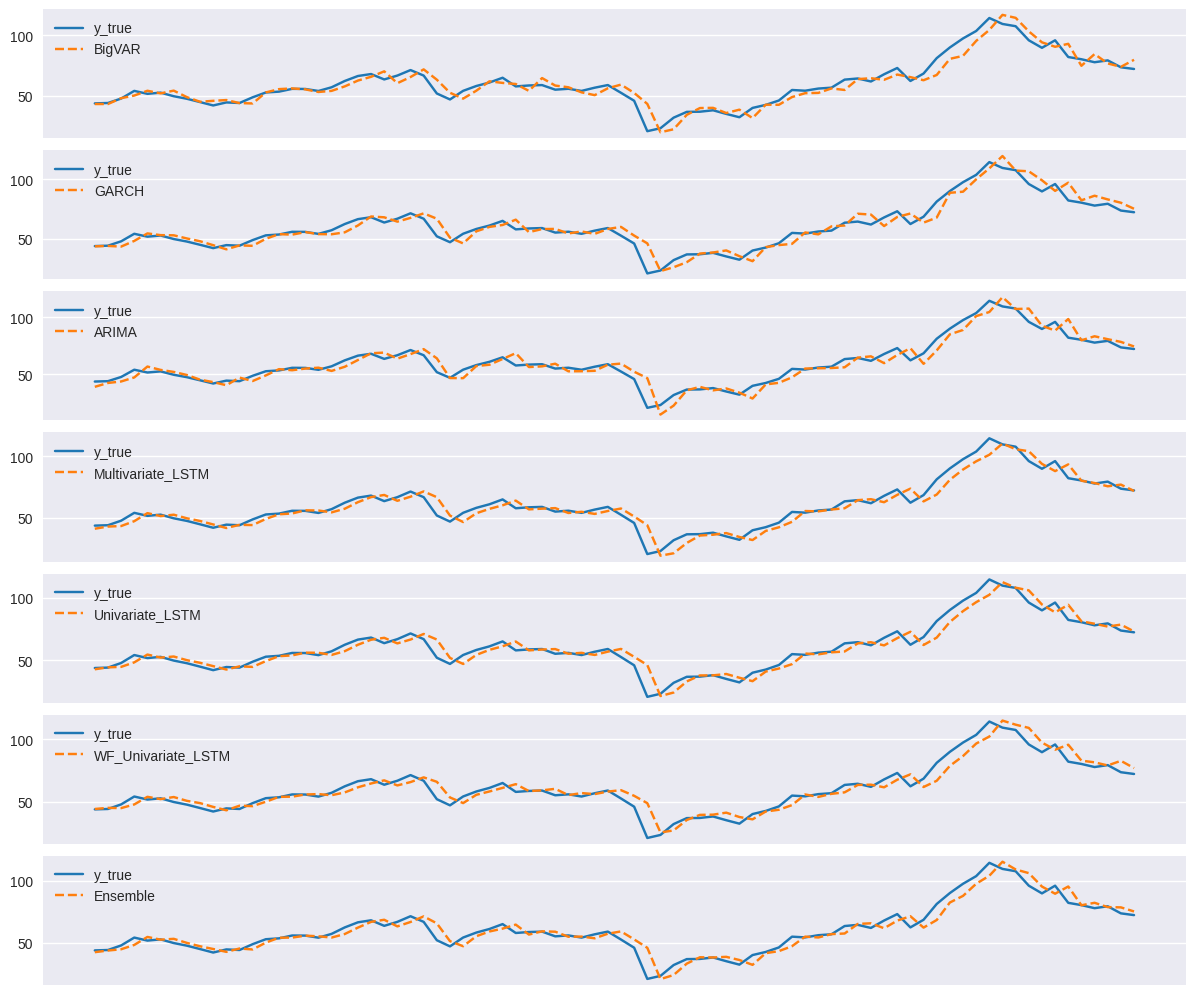

In [40]:
fig, axs = plt.subplots(7, 1, figsize=(12, 10))

# Your DataFrame columns that you want to plot against 'y_true'
cols_to_plot = [col for col in results_df.columns if (col!='RW_benchmark' and col!='true_prices')]

# Loop through the columns and create subplots
for i, col in enumerate(cols_to_plot):
    ax = axs[i]
    ax.plot(true, label='y_true', color='#1f77b4')
    ax.plot(results_df[col], label=f'{col}', linestyle='--', color='#ff7f0e')
    ax.legend()
    ax.set_xticks([])
    if i == len(cols_to_plot) - 1:
        ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

In [41]:
results_df.to_csv('averaging_results.csv', index = 'Date')